## Basic Example

To run this example, don't forget to set your `OPEN_API_KEY` on your `.env` file

In [1]:
from IPython.display import Image, display

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState, StateGraph


from assistant_core.builder import BuilderContext, SingleAgent
from assistant_core.factories import BaseAgentFactory
from assistant_core.nodes import AgentNode

In [2]:
ASSISTANT_PROMPT = """
You are a helpful assistant.
"""

In [3]:
class GeneralAssistantFactory(BaseAgentFactory):
    """Factory for creating a general-purpose assistant agent."""

    def create_graph_builder(self):
        return StateGraph(MessagesState)

    def create_agent_node(self):
        return AgentNode(
            name="assistant",
            model=self.model,
            prompts=[ASSISTANT_PROMPT],
        )

In [4]:
def get_assistant_graph():
    context = BuilderContext(GeneralAssistantFactory())

    director = SingleAgent()

    workflow = director.make(context)
    return workflow.compile(checkpointer=MemorySaver())

In [5]:
config = {"configurable": {"thread_id": "test"}}

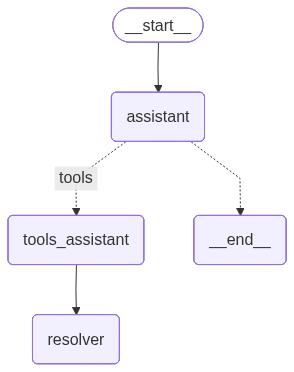

In [6]:
graph = get_assistant_graph()

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
response = await graph.ainvoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "Test message",
            }
        ],
    },
    config=config,
)

display(response["messages"][-1].content)

'Message received. How can I help you today?'